In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Read Results
batch_all = pd.read_excel("SVR2_Formatted.xlsx", 
                           names=['Glucose', 'Sucrose', 'pH', 'Fold Increase'])
batch_all

,Glucose,Sucrose,pH,Fold Increase
0,0,0,4.5,1.57
1,0,10,4.5,6.45
2,0,20,4.5,5.09
3,0,30,4.5,4.65
4,0,40,4.5,7.25
...,...,...,...,...
70,40,0,8.5,32.06
71,40,10,8.5,29.16
72,40,20,8.5,24.91
73,40,30,8.5,25.35


In [3]:
# Seperate Data to Low, Medium, and High pH Groups.

pHs = [4.5, 6.5, 8.5]

batch_lo = batch_all[batch_all["pH"] == pHs[0]]
batch_md = batch_all[batch_all["pH"] == pHs[1]]
batch_hi = batch_all[batch_all["pH"] == pHs[2]]

In [4]:
## Normalize data
# Select columns for SVR
x_cols = ["Glucose", "Sucrose"]
y_cols = ["Fold Increase"]

# Training use all the training data to train the model without splitting
x_all_lo=batch_lo[x_cols]
y_all_lo=batch_lo[y_cols]

x_all_md=batch_md[x_cols]
y_all_md=batch_md[y_cols]

x_all_hi=batch_hi[x_cols]
y_all_hi=batch_hi[y_cols]

# Define scalers
scalerG = batch_all["Glucose"].max()
scaler_y_lo = batch_lo["Fold Increase"].max()
scaler_y_md = batch_md["Fold Increase"].max()
scaler_y_hi = batch_hi["Fold Increase"].max()

# Function to process each batch
def normalize_batch(batch, scalerG, scaler_y):
    batch = batch.drop(columns=['pH'])  
    batch['Glucose'] = batch['Glucose'] / scalerG  
    batch['Sucrose'] = batch['Sucrose'] / scalerG  
    batch['Fold Increase'] = batch['Fold Increase'] / scaler_y  
    return batch

# Process each batch
batch_lo_nor = normalize_batch(batch_lo, scalerG, scaler_y_lo)
batch_md_nor = normalize_batch(batch_md, scalerG, scaler_y_md)
batch_hi_nor = normalize_batch(batch_hi, scalerG, scaler_y_hi)


In [5]:
X_lo = batch_lo_nor.iloc[:,:2]
X_md = batch_md_nor.iloc[:,:2]
X_hi = batch_hi_nor.iloc[:,:2]

In [6]:
y_lo=batch_lo_nor.iloc[:,2:]
y_md=batch_md_nor.iloc[:,2:]
y_hi=batch_hi_nor.iloc[:,2:]

In [7]:
# Define a function to perform GridSearchCV
def svr_grid_search(X, y, seed_range=range(200)):
    best_score = -np.inf
    best_model = None
    best_params = None
    best_seed = None

    param_grid = {
        'C': [0.1, 1, 10, 1e2],
        'gamma': [1, 10]
    }

    for seed in seed_range:
        svr = SVR(kernel='rbf')
        cv = KFold(n_splits=5, shuffle=True, random_state=seed)
        grid_search = GridSearchCV(svr, param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
        grid_search.fit(X, y)

        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
            best_seed = seed

    print(f"Best seed: {best_seed}")
    print(f"Best parameters: {best_params}")
    print(f"Best negMAE score: {best_score:.4f}")
    
    return best_model

# Perform GridSearchCV and print MAE
print("Tuning batch_lo_nor:")
best_svr_lo = svr_grid_search(X_lo, y_lo)

print("\nTuning batch_md_processed:")
best_svr_md = svr_grid_search(X_md, y_md)

print("\nTuning batch_hi_processed:")
best_svr_hi = svr_grid_search(X_hi, y_hi)


Tuning batch_lo_nor:


C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Best seed: 164
Best parameters: {'C': 1, 'gamma': 10}
Best negMAE score: -0.1105

Tuning batch_md_processed:


C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Best seed: 197
Best parameters: {'C': 100.0, 'gamma': 1}
Best negMAE score: -0.0989

Tuning batch_hi_processed:


C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Best seed: 178
Best parameters: {'C': 1, 'gamma': 1}
Best negMAE score: -0.0897


C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# Creating data for model to predict and condtruct 2D heatmap
gd_num = 401


xx = np.linspace(0, 40, gd_num)
yy = np.linspace(0, 40, gd_num)

# Create 2D space
X, Y = np.meshgrid(xx, yy)

# Flatten
X_flat = X.reshape(-1)
Y_flat = Y.reshape(-1)

# Normalizetion
X_nor = X_flat / scalerG
Y_nor = Y_flat / scalerG

# Make coordinations
NXY = np.array([X_nor, Y_nor]).T

# Model prediction
pred_lo = best_svr_lo.predict(NXY)
pred_lo = np.round(pred_lo * scaler_y_lo, 4)

# Model prediction
pred_md= best_svr_md.predict(NXY)
pred_md = np.round(pred_md * scaler_y_md, 4)

# Model prediction
pred_hi = best_svr_hi.predict(NXY)
pred_hi = np.round(pred_hi * scaler_y_hi, 4)

# Build df for all data
df_pred = pd.DataFrame({
    "X_nor": X_nor,
    "Y_nor": Y_nor,
    "pred_lo": pred_lo,
    "pred_md": pred_md,
    "pred_hi": pred_hi
})

df_pred

C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


,X_nor,Y_nor,pred_lo,pred_md,pred_hi
0,0.0000,0.0,2.7196,4.8122,18.4956
1,0.0025,0.0,2.7785,5.0674,18.5469
2,0.0050,0.0,2.8386,5.3218,18.5983
3,0.0075,0.0,2.8998,5.5756,18.6497
4,0.0100,0.0,2.9622,5.8285,18.7012
...,...,...,...,...,...
160796,0.9900,1.0,7.0548,25.4152,20.7581
160797,0.9925,1.0,7.0540,25.3996,20.7061
160798,0.9950,1.0,7.0531,25.3841,20.6542
160799,0.9975,1.0,7.0522,25.3689,20.6022


In [9]:
def plot_scatter(data, x="Glucose", y="Sucrose", c="Fold Increase", cmap='YlGnBu_r', marker='o', s=200, scaler=1, title='Low pH', vmin=0, vmax=33, edgecolor='k', linewidth=1):

    fig, ax = plt.subplots(1, 1, figsize=(8, 7))
    sc = ax.scatter(
        data[x] * scaler,
        data[y] * scaler,
        c=data[c],
        marker=marker,
        edgecolors=edgecolor,
        linewidths=linewidth,
        cmap=cmap,
        s=s,
        vmin=vmin,
        vmax=vmax
    )
    plt.rcParams['font.family'] = 'Arial'
    # ax.set_title(title, fontsize=24, pad=15)
    # ax.set_xlabel('Glucose (mg/mL)', fontsize=18)
    # ax.set_ylabel('Sucrose (mg/mL)', fontsize=18)
    ax.set_xticks(np.arange(0, 41, step=10))
    ax.set_yticks(np.arange(0, 41, step=10))
    ax.tick_params(axis='both', labelsize=30)
    return fig, ax

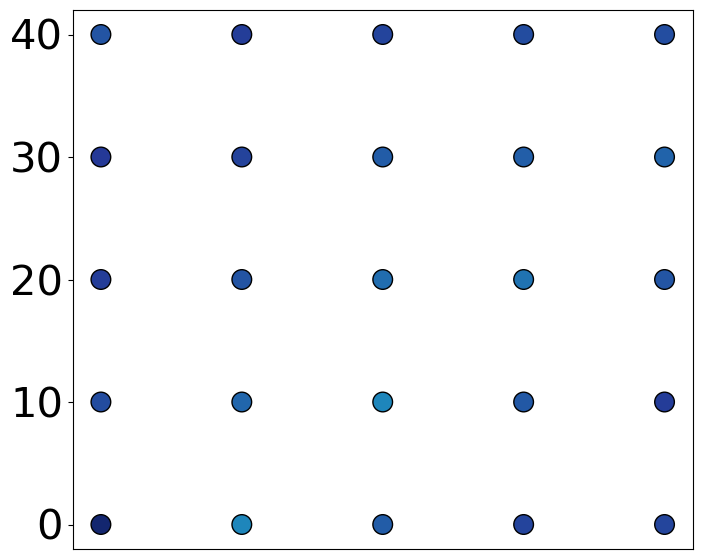

In [10]:
fig1, ax1 = plot_scatter(batch_lo)
ax1.set_xticks([])
fig1.savefig('Low_pH_dot.png', dpi=600, bbox_inches='tight')

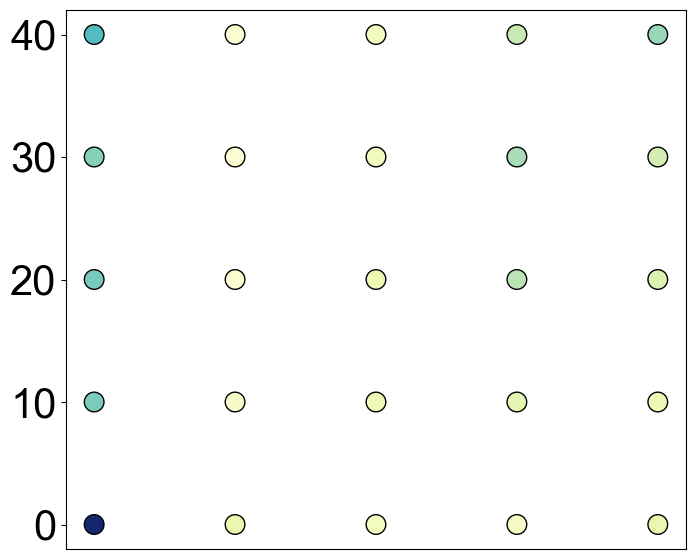

In [11]:
fig2, ax2 = plot_scatter(batch_md, title='Medium pH')
ax2.set_xticks([])
fig2.savefig('Md_pH_dot.png', dpi=600, bbox_inches='tight')

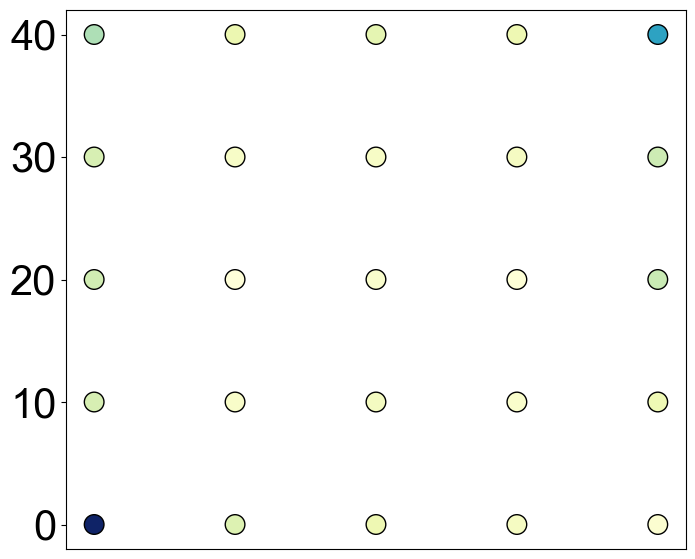

In [12]:
fig3, ax3 = plot_scatter(batch_hi, title='High pH')
ax3.set_xticks([])
fig3.savefig('Hi_pH_dot.png', dpi=600, bbox_inches='tight')

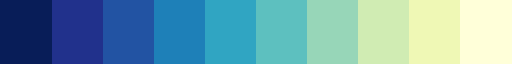

In [13]:
# Fetch the 'magma' colormap
magma_cmap = plt.colormaps['YlGnBu_r']
n_segments = 10
color_range = np.linspace(0, 1, n_segments)
colors = [magma_cmap(x) for x in color_range]
cmap_name = 'segmented_magma'

# Create a LinearSegmentedColormap from the list of colors
seg_magma = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_segments)
seg_magma

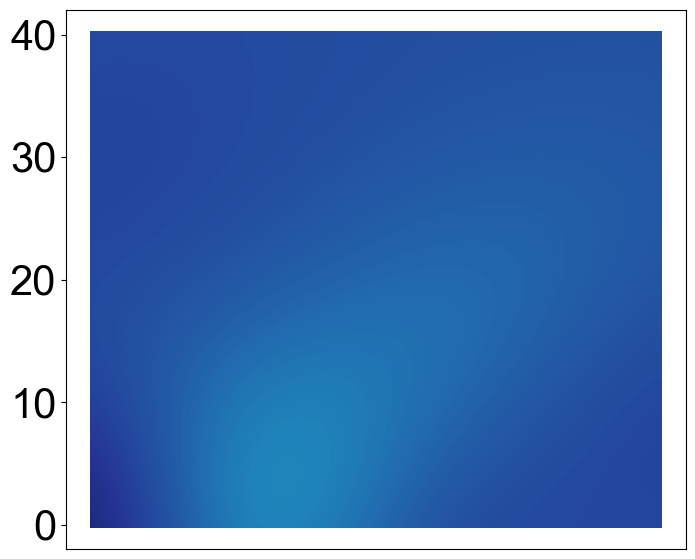

In [14]:
fig, ax = plot_scatter(df_pred, x="X_nor", y="Y_nor", c="pred_lo", scaler=40, marker=',', s=30, vmin=0, vmax=33, edgecolor='face', linewidth=0, cmap='YlGnBu_r')
ax.set_xticks([])
fig.savefig('Low_pH_HM.png', dpi=600, bbox_inches='tight')

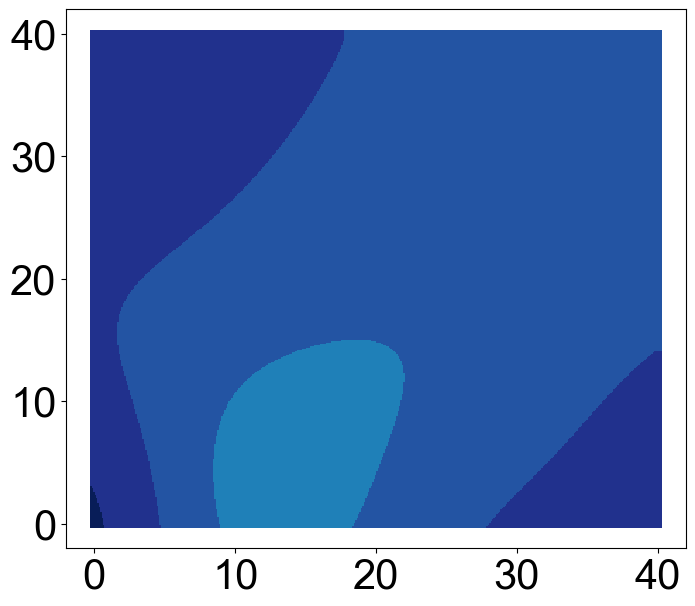

In [15]:
fig, ax = plot_scatter(df_pred, x="X_nor", y="Y_nor", c="pred_lo", scaler=40, marker=',', s=30, vmin=0, vmax=33, edgecolor='face', linewidth=0, cmap=seg_magma)
fig.savefig('Low_pH_Seg.png', dpi=600, bbox_inches='tight')

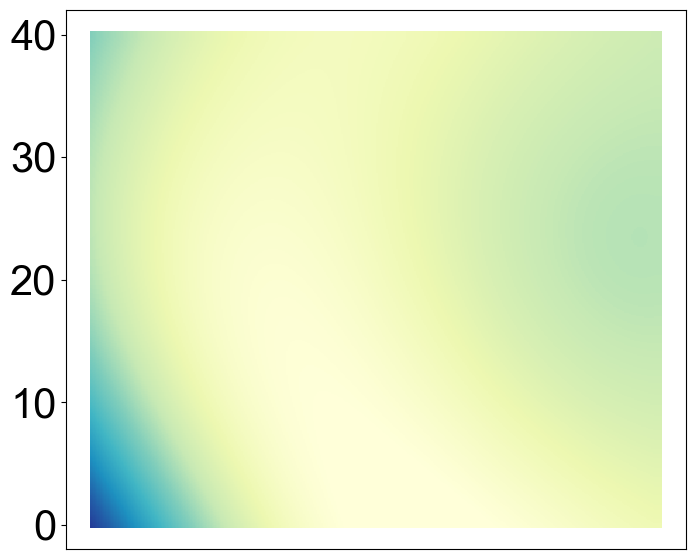

In [16]:
fig, ax = plot_scatter(df_pred, x="X_nor", y="Y_nor", c="pred_md", scaler=40, marker=',', s=30, vmin=0, vmax=33, edgecolor='face', linewidth=0, cmap='YlGnBu_r', title='Mid pH')
ax.set_xticks([])
fig.savefig('Md_pH_HM.png', dpi=600, bbox_inches='tight')

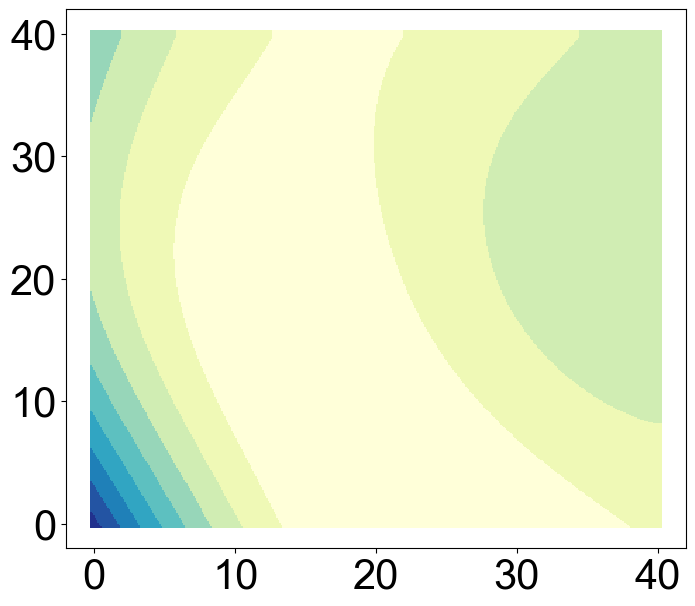

In [17]:
fig, ax = plot_scatter(df_pred, x="X_nor", y="Y_nor", c="pred_md", scaler=40, marker=',', s=30, vmin=0, vmax=33, edgecolor='face', linewidth=0, cmap=seg_magma, title='Mid pH')
fig.savefig('Md_pH_Seg.png', dpi=600, bbox_inches='tight')

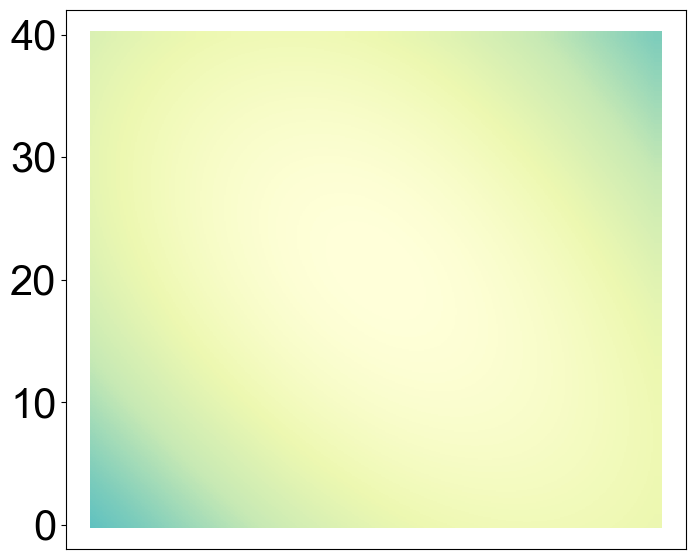

In [18]:
fig, ax = plot_scatter(df_pred, x="X_nor", y="Y_nor", c="pred_hi", scaler=40, marker=',', s=30, vmin=0, vmax=33, edgecolor='face', linewidth=0, cmap='YlGnBu_r', title='High pH')
ax.set_xticks([])
fig.savefig('Hi_pH_HM.png', dpi=600, bbox_inches='tight')


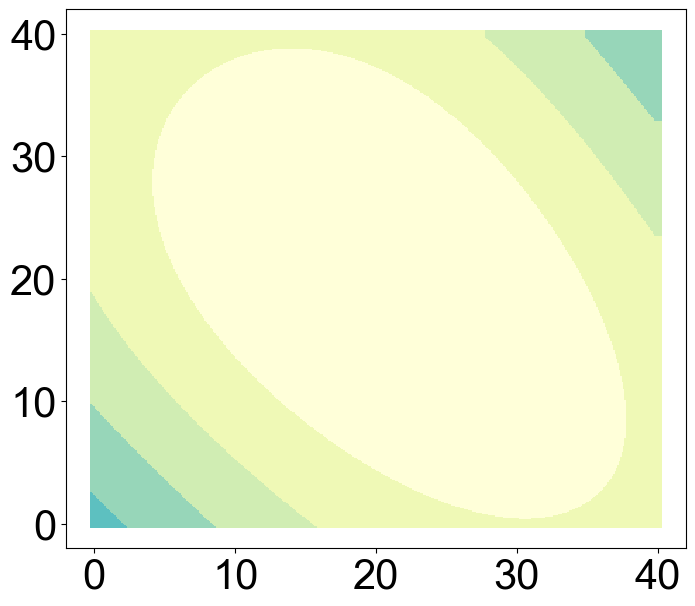

In [19]:
fig, ax = plot_scatter(df_pred, x="X_nor", y="Y_nor", c="pred_hi", scaler=40, marker=',', s=30, vmin=0, vmax=33, edgecolor='face', linewidth=0, cmap=seg_magma, title='High pH')
fig.savefig('Hi_pH_Seg.png', dpi=600, bbox_inches='tight')